# CIRBE PySPEDAS module example 
'cirbe.reptile2' function works similarly to pyspedas load routines: it loads tplot variables from netcdf file and processes them to create electron spectra (version = "l2" flag). This notebook can show 2 examples (trange strings) that show the usability of this module.

In [ ]:
import cirbe
trange = ["2023-08-21/20:37", "2023-08-21/20:55"]    #1st example
# trange = ["2023-10-17/20:59", "2023-10-17/21:16"]  #2nd example
version = 'v2'
cirbe.reptile2(trange, version= version, time_clip = True)

12-Feb-25 16:35:49: Downloading https://www.dropbox.com/scl/fo/u4ec7gtzd0ddd4dh8ivn3/AOBmfGV4se8-RxujzUYTu2E/CIRBE_REPTile-2_L1_20230821v2_0.nc?rlkey=q257y4uz7jocnx3n5gdj0kxky&dl=1 to cirbe_data/CIRBE_REPTile-2_L1_20230821v2_0.nc
12-Feb-25 16:35:50: Download complete: cirbe_data/CIRBE_REPTile-2_L1_20230821v2_0.nc
12-Feb-25 16:35:50: Fixing 'Epoch' variable for cirbe_data/CIRBE_REPTile-2_L1_20230821v2_0.nc
12-Feb-25 16:35:50: Saved in cirbe_data/CIRBE_REPTile-2_L1_20230821v2_0_fixepoch.nc
12-Feb-25 16:35:51: CIRBE REPTile-2 L2: START PROCESSING.


['Alt',
 'Lat',
 'Lon',
 'L',
 'MLT',
 'MLAT',
 'Pbins_RNG',
 'Pbins_PEN',
 'Ebins_RNG',
 'Ebins_PEN',
 'D1',
 'D2',
 'D3',
 'D4',
 'G',
 'D12n',
 'D123n',
 'D1234n',
 'D1234',
 'IntePrd',
 'spacecraft_pointing_mode',
 'invalid_data_flag',
 'cirbe_efluxe_adapted']

In [3]:
help(cirbe.reptile2)

Help on function reptile2 in module cirbe.load:

reptile2(trange=['2024-09-21', '2024-09-22'], type='flux', suffix='', version='v2', downloadonly=False, notplot=False, no_update=False, time_clip=False, force_download=False)
    This function loads data from the CIRBE\REPTile-2 instrument and process it into electron spectra.
    
    Parameters for Load Routine
    ---------------------------
        trange : list of str
            Time range of interest [starttime, endtime]. Format can be
            ['YYYY-MM-DD','YYYY-MM-DD'] or ['YYYY-MM-DD/hh:mm:ss','YYYY-MM-DD/hh:mm:ss']
            Default: ['2022-08-19', '2022-08-19']
    
        type: str, optional
            Calibrated data type of L1 data. Only option 'flux' for now.
    
        version: str, optional.
            Version of L1 data. Options are 'v1' and 'v2'.
            Default: 'v2'.
    
        downloadonly: bool, optional
            Not implemented yet. If True, only downloads the CDF files without loading them in

This block will plot figure from tplot variables to .png files

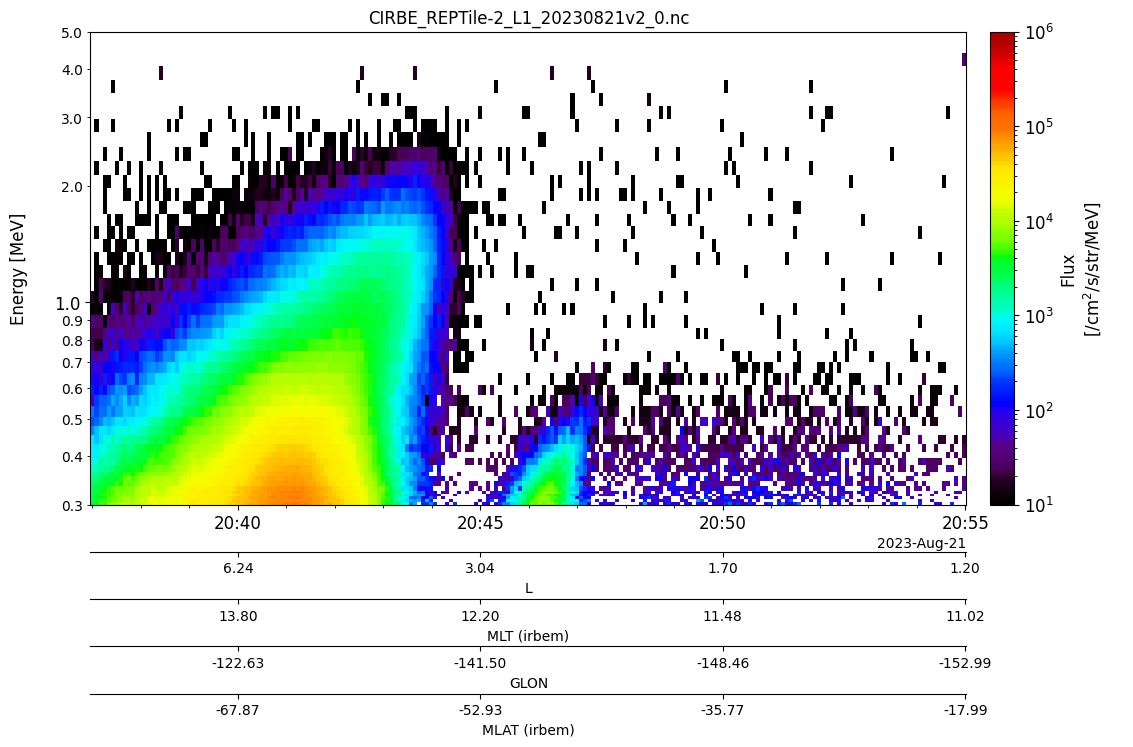

In [4]:
import pyspedas
pyspedas.options('Lon', 'ytitle','GLON')
pyspedas.options('MLT', 'ytitle','MLT (irbem)')
pyspedas.options('MLAT', 'ytitle','MLAT (irbem)')

pyspedas.tplot_options('title',f"CIRBE_REPTile-2_L1_{trange[0][:10].replace('-', '')}{version}_0.nc")

#tplot does not transfer all parameters to tplot.MPLPlotter, so we will add some changes 
# using matplotlib library directly
from matplotlib.ticker import FormatStrFormatter, FixedLocator, AutoMinorLocator

fig, ax = pyspedas.tplot('cirbe_efluxe_adapted', var_label = ['L',  'MLT', 'Lon','MLAT'],
                ysize=11, display = False, 
                return_plot_objects=True)  
     
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
fig.show()
# save file to .png
fig.savefig(f"./figs/CIRBE_REPTile-2_L1_{trange[0][:10].replace('-', '')}-{trange[0][11:].replace(':', '')}{version}-{trange[1][11:].replace(':', '')}{version}.png", format = 'png')

# Dropbox parser module for updating the list of L1 files
In order to avoid using dropbox API and headless browsers, this function was written to scrape the links of CIRBE files **provided user saves dropbox page with necessary files as .htm file.**
Specifically, user should:
1. Open the [CIRBE/REPTile-2 Data Products page](https://lasp.colorado.edu/cirbe/data-products/), 
2. Open one of the "Download (netCDF)" links (either "v1" or "v2" by the time of writing) 
3. Scroll down the dropbox page to the bottom until (**crucial!**) it stops loading more files
4. "Save page as" to some local path
5. Use function *parse_links* to create the list of links to CIRBE files in that folder (for now please save it to "/cirbe/htms/CIRBE_REPTile-2_L1_vX.txt" of this module, X - version of the files, either "v1" or "v2" by the time of writing)

In [ ]:
cirbe.parse_links('./cirbe/htms/CIRBE_REPTile-2_L1_v2 - Dropbox.htm', './cirbe/htms/CIRBE_REPTile-2_L1_v2.txt')
cirbe.parse_links('./cirbe/htms/CIRBE_REPTile-2_L1_v1 - Dropbox.htm', './cirbe/htms/CIRBE_REPTile-2_L1_v1.txt')


10-Feb-25 22:08:51: 414 links are saved in ./cirbe/htms/CIRBE_REPTile-2_L1_v2.txt
10-Feb-25 22:08:51: 218 links are saved in ./cirbe/htms/CIRBE_REPTile-2_L1_v1.txt
